In [1]:
%matplotlib inline

# K-Nearest Neighbors

## Import Dependencies

In [2]:
from time import time
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

## Load the Data

In [3]:
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')
y_train = y_raw[0:3900]
y_valid = y_raw[3900:4875]
y_test = y_raw[4875:6500]

print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


### Print Out Example Data

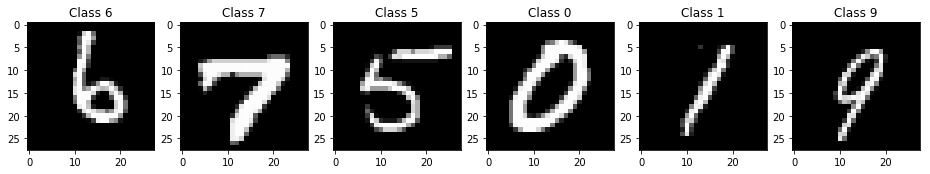

In [4]:
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

## Reshape The Data

In [5]:
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


## Training
We will be testing k-ranges between 1 and 10 and adding them to a list to plot later.

Episode: 1/10 and took 13.71s
Episode: 2/10 and took 13.80s
Episode: 3/10 and took 13.79s
Episode: 4/10 and took 14.37s
Episode: 5/10 and took 14.54s
Episode: 6/10 and took 13.73s
Episode: 7/10 and took 14.33s
Episode: 8/10 and took 14.33s
Episode: 9/10 and took 14.01s
Episode: 10/10 and took 17.30s
Total time elapsed: 143.91s


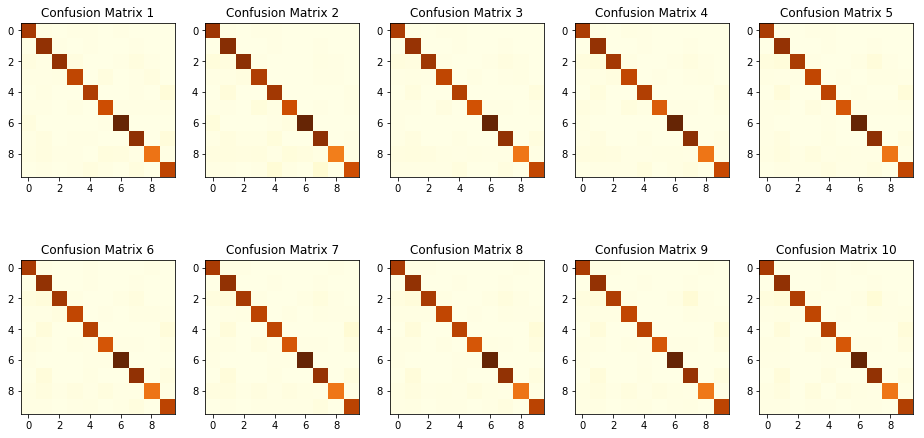

In [6]:
error = []
test_accuracy = []
valid_accuracy = []
predictions = []
X = X_train.reshape(-1,28*28)
y = y_train
neighbor_range = 10
plt.figure(figsize=(16,8))
t0 = time()
for i in range(1,neighbor_range+1):
    ti = time()
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(X, y)
    pred_i = clf.predict(X_test.reshape(-1,28*28))
    valid_pred_i = clf.predict(X_valid.reshape(-1,28*28))
    predictions.append(pred_i)
    error.append(np.mean(pred_i != y_test))
    test_accuracy.append(accuracy_score(y_test, pred_i))
    valid_accuracy.append(accuracy_score(y_valid, valid_pred_i))
    cnf_matrix = confusion_matrix(y_test,pred_i)
#     print(cnf_matrix)
    # Plot non-normalized confusion matrix
    plt.subplot(2,neighbor_range/2,i)
    plt.imshow(cnf_matrix, cmap='YlOrBr')
    plt.title("Confusion Matrix {}".format(i))
#     plt.colorbar()
    
    print('Episode: {}/{} and took %.2fs'.format(i, neighbor_range) % (time()-ti))
print('Total time elapsed: %.2fs' % (time()-t0))

Plot error and accruacy vs. k-range

## Graph Accuracy and Error per K-value

Highest test accuracy: 0.947076923076923 with k-value of 3
Highest validation accuracy: 0.9343589743589743 with k-value of 1


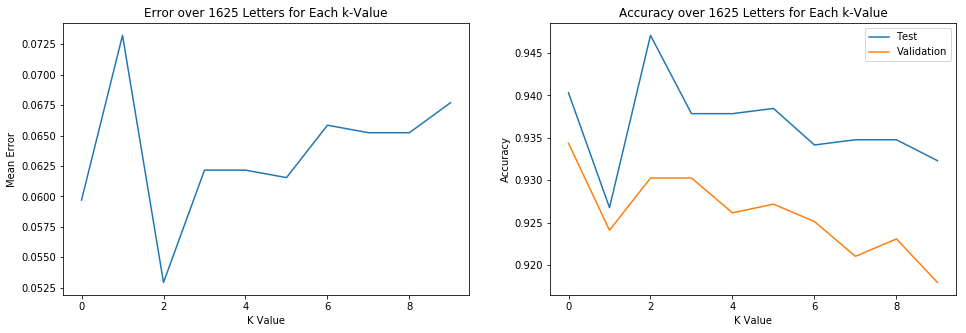

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(error)
plt.title('Error over {} Letters for Each k-Value'.format(len(predictions[0])))  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

plt.subplot(1,2,2)
plt.plot(test_accuracy)
plt.plot(valid_accuracy)
plt.title('Accuracy over {} Letters for Each k-Value'.format(len(predictions[0])))  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'])

print("Highest test accuracy: {} with k-value of {}"
      .format(max(test_accuracy), test_accuracy.index(max(test_accuracy))+1))
print("Highest validation accuracy: {} with k-value of {}"
      .format(max(valid_accuracy), valid_accuracy.index(max(valid_accuracy))+1))

In [8]:
correct_indices = np.nonzero(predictions[2] == y_test)[0]
incorrect_indices = np.nonzero(predictions[2] != y_test)[0]

## Display Correct Prediction Examples

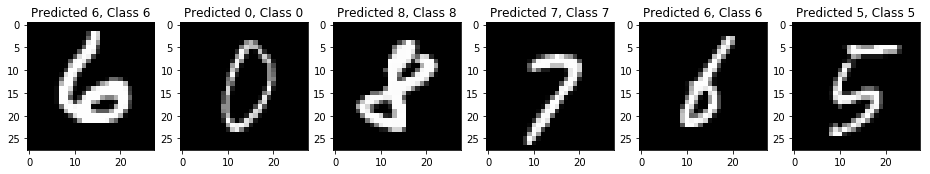

In [9]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[2][correct], y_test[correct]))

## Display Incorrect Prediction Examples

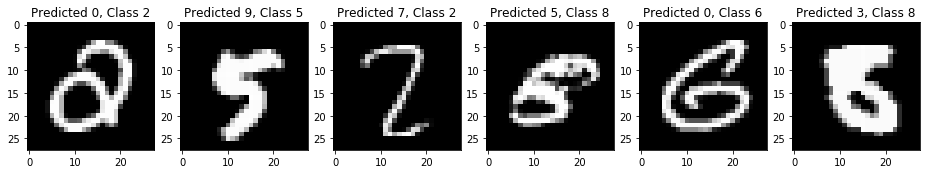

In [10]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[2][incorrect], y_test[incorrect]))

## Evaluation of Incorrect Prediction

The K-nearest neighbors algorithm was less accurate than the ANN, but more accurate than the Decision Tree classifier. All of the algorithms struggled with poorly written numbers like the fourth and sixth examples here where the lines are blurred, unclear, or improperly intersect. The third example shows a case where the bottom of the two was ignored, possibly because it was not percieved as a distinguished feature. 